## Game of Love - Final Project - CoderSchool Machine Learning 1 - Harley Trung

## Table of Contents

1. Introduction To Your Dataset
2. Exploratory Data Analysis
3. Build and Evaluate Classification Model: Logistic Regression and Random Forest
4. Further Investigation
5. Conclusion

# 1. Introduction


Most or all of the audience of this project are between 20 and 40 years of age. Most of us have been heavily influenced by the media in our life. Beauty, intelligence, and wealth are often praised. Many people are also familiar with instant dating apps such as Tinder, TanTan Parkour and more (I'm a little out of date because I've been out of the game for same time). 

I picked this Speed Dating data set to look into what is important to people when they date and whether they really get what they want.

#### About the data

The data was compiled by two professors from Columbia Business School, Ray Fisman and Sheena Iyengar. See #Credits at the end for the source.

- **552** participants in experimental speed dating events **2002-2004**
- Speed data: **4-minute first date** with participants of opposite sex
- Each was asked if they would like to see their date again, plus raiting on 6 attributes:
    - Attractiveness
    - Sincerity
    - Intelligence
    - Fun
    - Ambition
    - Shared Interests
    
- Additional questionnaire data at different points in the process:
    - Demographics
    - Dating habits
    - Self-perception across key attributes
    - Beliefs on what others find valuable in a mate
    - Lifestyle information

# 2. Exploratory Data Analysis

> Analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) is for seeing what the data can tell us


In [307]:
# data
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [308]:
path = "./speed-dating-experiment/Speed Dating Data.csv"
data = pd.read_csv(path, encoding="ISO-8859-1")

In [309]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


**There are 8378 rows because each participant can be in the data multiple times for multiple potential matches.**

### How many people found dates? (17%)

We can cross check the 'match' column and count:

In [389]:
match = pd.crosstab(index=data.match, columns="match count")
match

col_0,match count
match,
0,6998
1,1380


In [312]:
print('Success (%): ', match.values[1][0] * 100 / len(data))

Success (%):  16.47171162568632


**Insights**:

* Rejection is more common. That's life.

### How many unique participants are there?  (551)

In order to find unique participants, we get the unique rows based on participant attributes, and keep only the attributes we potentially analyze.

Let's group the attributes in personal vs evaluation vs outcome attributes

In [314]:
# CREDIT: Use the idea of personal/decision/evaluation/outcome by https://www.kaggle.com/lucabasa/the-data-science-book-of-love

personal = [
    'gender', # Female: 0, Male: 1
    'age',
    'field', # field of stdy
    'field_cd', # field coded
    'undergra',
    'race',
    'imprace', # importance race is same background
    'imprelig', # importance religion is same background
    'from', # original
    # goals and habits
    'goal', # goal in this event
    'date', # freq going on dates
    'go_out', # freq going out
    'career', # intended career
    'career_c', # career coded
    # how interested are you in the following activities:
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
    'music', 'shopping', 'yoga',
    # expectations, happiness, and estimation
    'exphappy', # how happy with people during speed-dating
    'expnum', # how many will be interestd in dating you
    'match_es', # how many matches you estimate to get
]

decision = [
    'match', # id?
    'dec', # yes, no
    'attr', 'sinc', 'intel',
    'fun', 'amb', 'shar', 
    'like', # how much you like this person
    'prob' # how prob they will say yes to you
]

evaluation = [
    'satis_2', # overall, how satisfied were you with the people you met?
    'length', # 4 minutes is 1: Too little, 2: Too much, 3: Just right
    'numdat_2', # number of speed dates you had was 1: Too few, 2: Too many, 3: Just right
]

# 3-4 weeks after they have been sent their matches
outcome = [
    'you_call', # How many have you contacted to set up a date?
    'them_cal', # How many have contacted you
    'date_3', # have you been on a date with a match?
    'numdat_3', # how many matches you've been on a date with?
    'num_in_3'# how many dates
]

In [327]:
# Leave out the `decision` field to find unique participants
df = data[['iid', 'wave'] + personal + evaluation + outcome].drop_duplicates().copy()
print('Number of rows', len(df))
print('Number of waves of experiments', df['wave'].nunique())

df.count().head(10)

Number of rows 551
Number of waves of experiments 21


iid         551
wave        551
gender      551
age         543
field       545
field_cd    544
undergra    315
race        545
imprace     544
imprelig    544
dtype: int64

Therefore, there are **551 participants** (across 21 waves).

Some individual perform more ratings than others, thus the data could be in a way biased.

We created a data frame with unique participants.

#### Participant Distribution

In [328]:
# Remapping gender info from 0, 1 to 'Female', 'Male'
df.gender = df.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df.gender)

# Keep the data.gender column as Int for LogisticRegression later
# data.gender = data.gender.map({1 : 'Male', 0 : 'Female'}).fillna(data.gender)

In [329]:
data.gender.value_counts(dropna=False)

1    4194
0    4184
Name: gender, dtype: int64

In [330]:
df.gender.value_counts(dropna=False)

Male      277
Female    274
Name: gender, dtype: int64

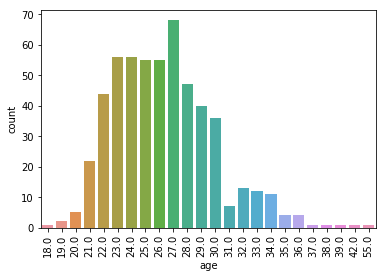

In [332]:
# TODO: Plot Gender vs Age from Participants
ax = sns.countplot(df['age'])
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
ax

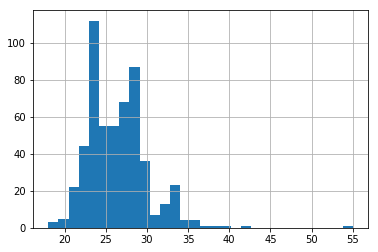

In [333]:
df.age.hist(bins=30)
# TOD: I'm doing something wrong here: this chart and the above are different

**The majority of the participants are between 21 and 30.**

In [334]:
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Male      277
Female    274
Name: gender, dtype: int64

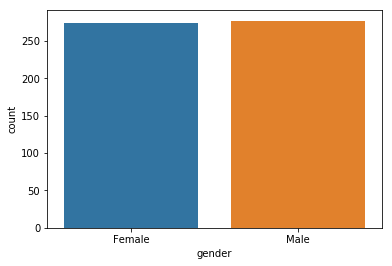

In [335]:
display(df.gender.value_counts())
sns.countplot(x='gender', data=df)

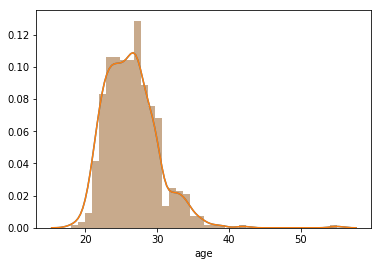

In [336]:
male = df[df['gender'] == 'Male']
female = df[df['gender'] == 'Female']
sns.distplot(df['age'].dropna(), label='Male')
sns.distplot(df['age'].dropna(), label='Female')

### Gender vs Age

The most important attribute is Gender, because each participates dates with the opposite sex.

First we look at the distribution of age.

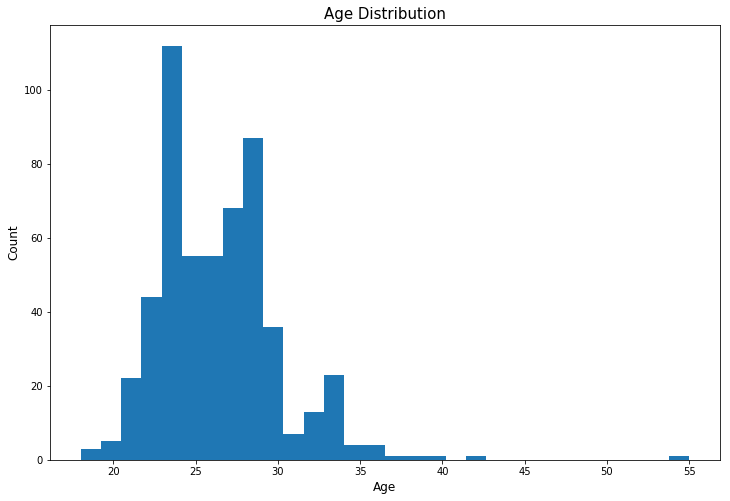

In [338]:
ax = participants.age.hist(bins=30, figsize=(12,8))
ax.set_title('Age Distribution', fontsize=15)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(False)

In [340]:
df[['gender', 'age']].groupby('gender').agg(
    ['mean', 'median', 'min', 'max', 'count']
)

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

## Importance of Race and Religion

People were asked to rate the importance of race and religion when it comes to rating. Analyzing this helps understands personal bias.

### Race

In [341]:
df['race'].value_counts()

2.0    304
4.0    136
3.0     42
6.0     37
1.0     26
Name: race, dtype: int64

In [390]:
df['race'] = df.race.map({
 1: 'Black', 2: 'White', 3: 'Hispanic', 4: 'Asian', 
    5: 'Native American', 6: 'Other'
})
df.race.value_counts()

Series([], Name: race, dtype: int64)

**Insights:**

* Naturally, there were no Native American participants in the program which was in Columbia in New York.
* White people participate the most, then Asians, then Hispanic

### Importance of Race

Text(0.5,1,'Importance of race in dating')

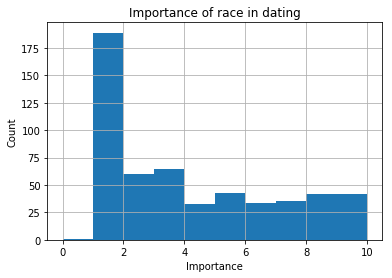

In [343]:
ax = df.imprace.hist()
ax.set_xlabel('Importance')
ax.set_ylabel('Count')
ax.set_title('Importance of race in dating')

**Breakdown by Race**

* White people care more about the importance of race

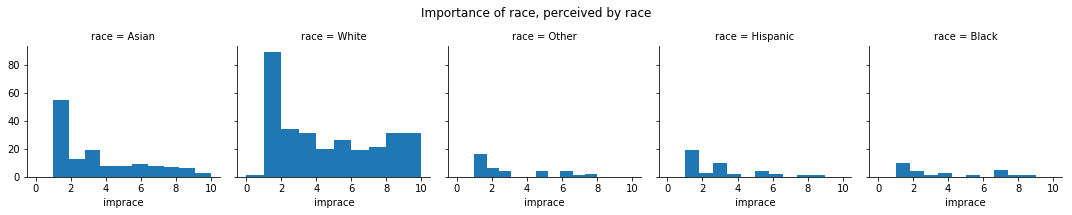

In [344]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprace', bins=10)
g.fig.suptitle('Importance of race, perceived by race')
# g.add_legend()
plt.subplots_adjust(top=0.8)

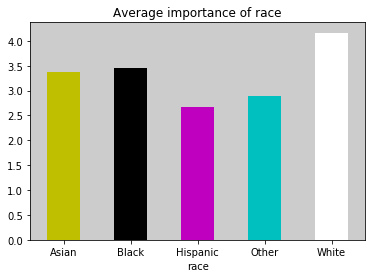

In [345]:
ax = df[['race', 'imprace']].groupby('race').mean().plot(
    kind='bar', legend=False, title='Average importance of race',
    color='ykmcw'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation='horizontal')
ax.set_facecolor('#CCCCCC')

**Breakdown by Gender**

* Women care less about the importance of race

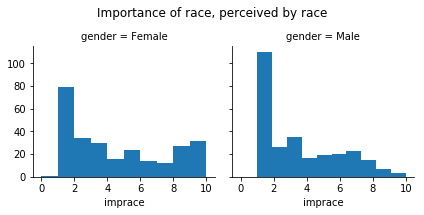

In [346]:
g = sns.FacetGrid(df, col='gender')
g.map(plt.hist, 'imprace', bins=10)
g.fig.suptitle('Importance of race, perceived by race')
# g.add_legend()
plt.subplots_adjust(top=0.8)

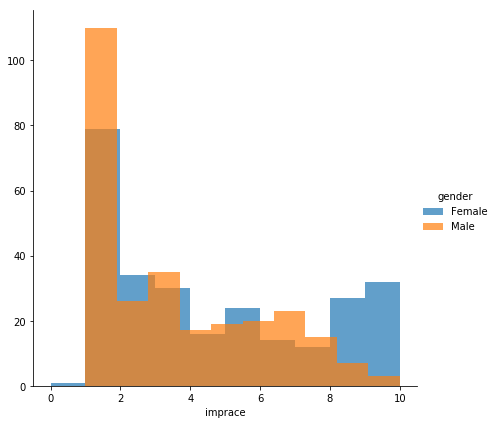

In [347]:
g = sns.FacetGrid(df, hue='gender', height=6)
g.map(plt.hist, 'imprace', alpha=0.7, bins=10)
g.add_legend()

### Gender vs Race

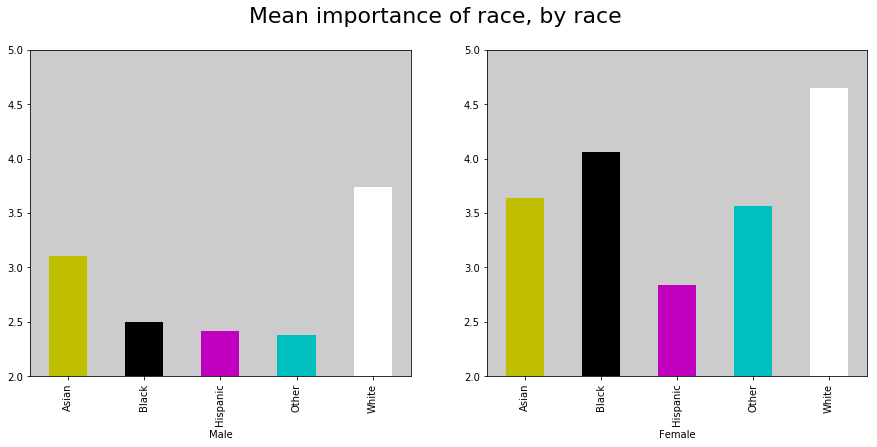

In [348]:
fig, ax= plt.subplots(1,2, figsize=(15, 6))

ax1 = df[df.gender=='Male'][['race', 'imprace']].groupby('race').mean().plot(kind='bar', ax=ax[0], color='ykmcw', ylim=(2,5), legend=False)
ax2 = df[df.gender=='Female'][['race', 'imprace']].groupby('race').mean().plot(kind='bar', ax=ax[1], color='ykmcw', ylim=(2,5), legend=False)
fig.suptitle('Mean importance of race, by race', fontsize=22)
ax1.set_facecolor('#CCCCCC')
ax2.set_facecolor('#CCCCCC')
ax1.set_xlabel('Male')
ax2.set_xlabel('Female')
None

**Other insights**:
    
* White women value race the most
* White men also value race the most, but black women value race more than white men


### Importance of Religion


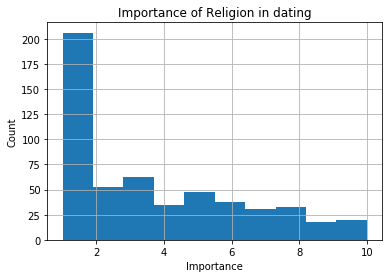

In [349]:
ax = df.imprelig.hist()
ax.set_xlabel('Importance')
ax.set_ylabel('Count')
ax.set_title('Importance of Religion in dating')
None

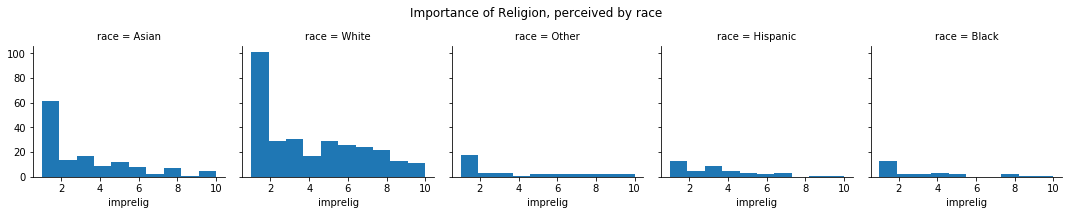

In [350]:
g = sns.FacetGrid(df, col='race')
g.map(plt.hist, 'imprelig', bins=10)
g.fig.suptitle('Importance of Religion, perceived by race')
# g.add_legend()
plt.subplots_adjust(top=0.8)

imprelig                        
                     mean median  min   max count
gender race                                      
Female Asian     3.549296    3.0  1.0  10.0    71
       Black     3.875000    2.5  1.0  10.0    16
       Hispanic  3.360000    3.0  1.0  10.0    25
       Other     4.687500    4.5  1.0  10.0    16
       White     4.553191    4.0  1.0  10.0   141
Male   Asian     2.476923    1.0  1.0   8.0    65
       Black     1.800000    1.0  1.0   4.0    10
       Hispanic  3.117647    3.0  1.0   9.0    17
       Other     2.476190    1.0  1.0   9.0    21
       White     3.395062    2.0  1.0  10.0   162

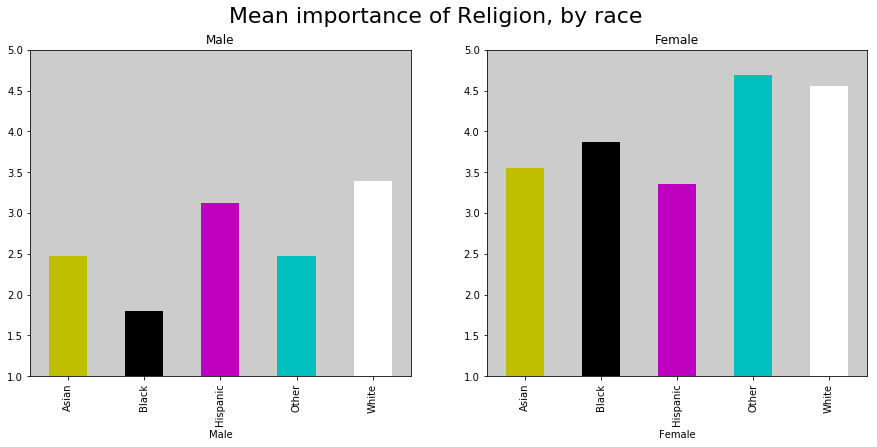

In [351]:
display(df[['gender', 'race', 'imprelig']].groupby(['gender', 'race'])\
.agg(['mean', 'median', 'min', 'max', 'count']))

fig, ax= plt.subplots(1,2, figsize=(15, 6))

ax1 = df[df.gender=='Male'][['race', 'imprelig']].groupby('race').mean().plot(kind='bar', ax=ax[0], color='ykmcw', ylim=(1,5), legend=False, title='Male')
ax2 = df[df.gender=='Female'][['race', 'imprelig']].groupby('race').mean().plot(kind='bar', ax=ax[1], color='ykmcw', ylim=(1,5), legend=False, title='Female')
fig.suptitle('Mean importance of Religion, by race', fontsize=22)
ax1.set_facecolor('#CCCCCC')
ax2.set_facecolor('#CCCCCC')
ax1.set_xlabel('Male')
ax2.set_xlabel('Female')
None

**Insights:**
    
* White women give more importance to Religion than others
* Hispanic men and women are more or less the same to each other on race and religion importance. 

## Personal Interests

We analyze the answer to the following questions:

* What is your primary goal in participating in this event?
* How often do you go out on dates?
* How often do you go out at all?
* What is your intended career?
* How interested are you in ... activities?

Seemed like fun          228
Meet new people          189
Get a date                40
To say I did it           35
Other                     30
Look for relationship     22
NaN                        7
Name: goal, dtype: int64

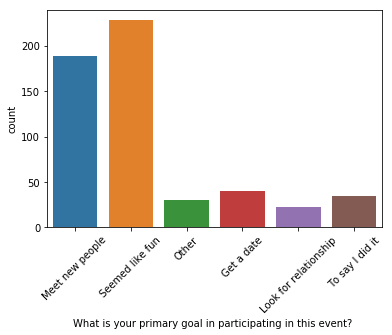

In [352]:
# Replace goal with worded version:
goal_map = {
    1: 'Seemed like fun', 
    2: 'Meet new people', 
    3: 'Get a date', 
    4: 'Look for relationship', 
    5: 'To say I did it', 
    6: 'Other'
}
df['goal'] = df.goal.map(goal_map).fillna(df.goal)
data['goal'] = data.goal.map(goal_map).fillna(data.goal)
g = sns.countplot(df.goal)
g.set_xlabel('What is your primary goal in participating in this event? ')
plt.xticks(rotation=45)
df.goal.value_counts(dropna=False)

Text(0,0.5,'Participate in event because...')

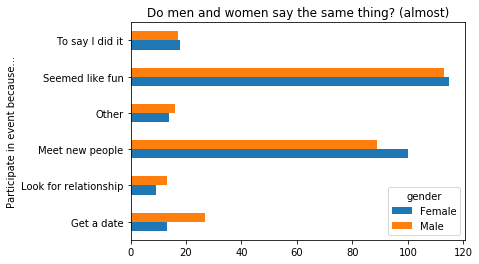

In [353]:
tmp = df[['gender', 'goal']].groupby(['goal', 'gender']).size().unstack()
ax = tmp.plot(kind='barh')
ax.set_title('Do men and women say the same thing? (almost)')
ax.set_ylabel('Participate in event because...')

**Insights:**
    
    * Men and women answer similar things, unless they talk about finding a date or meeting someone

## What are people looking for?

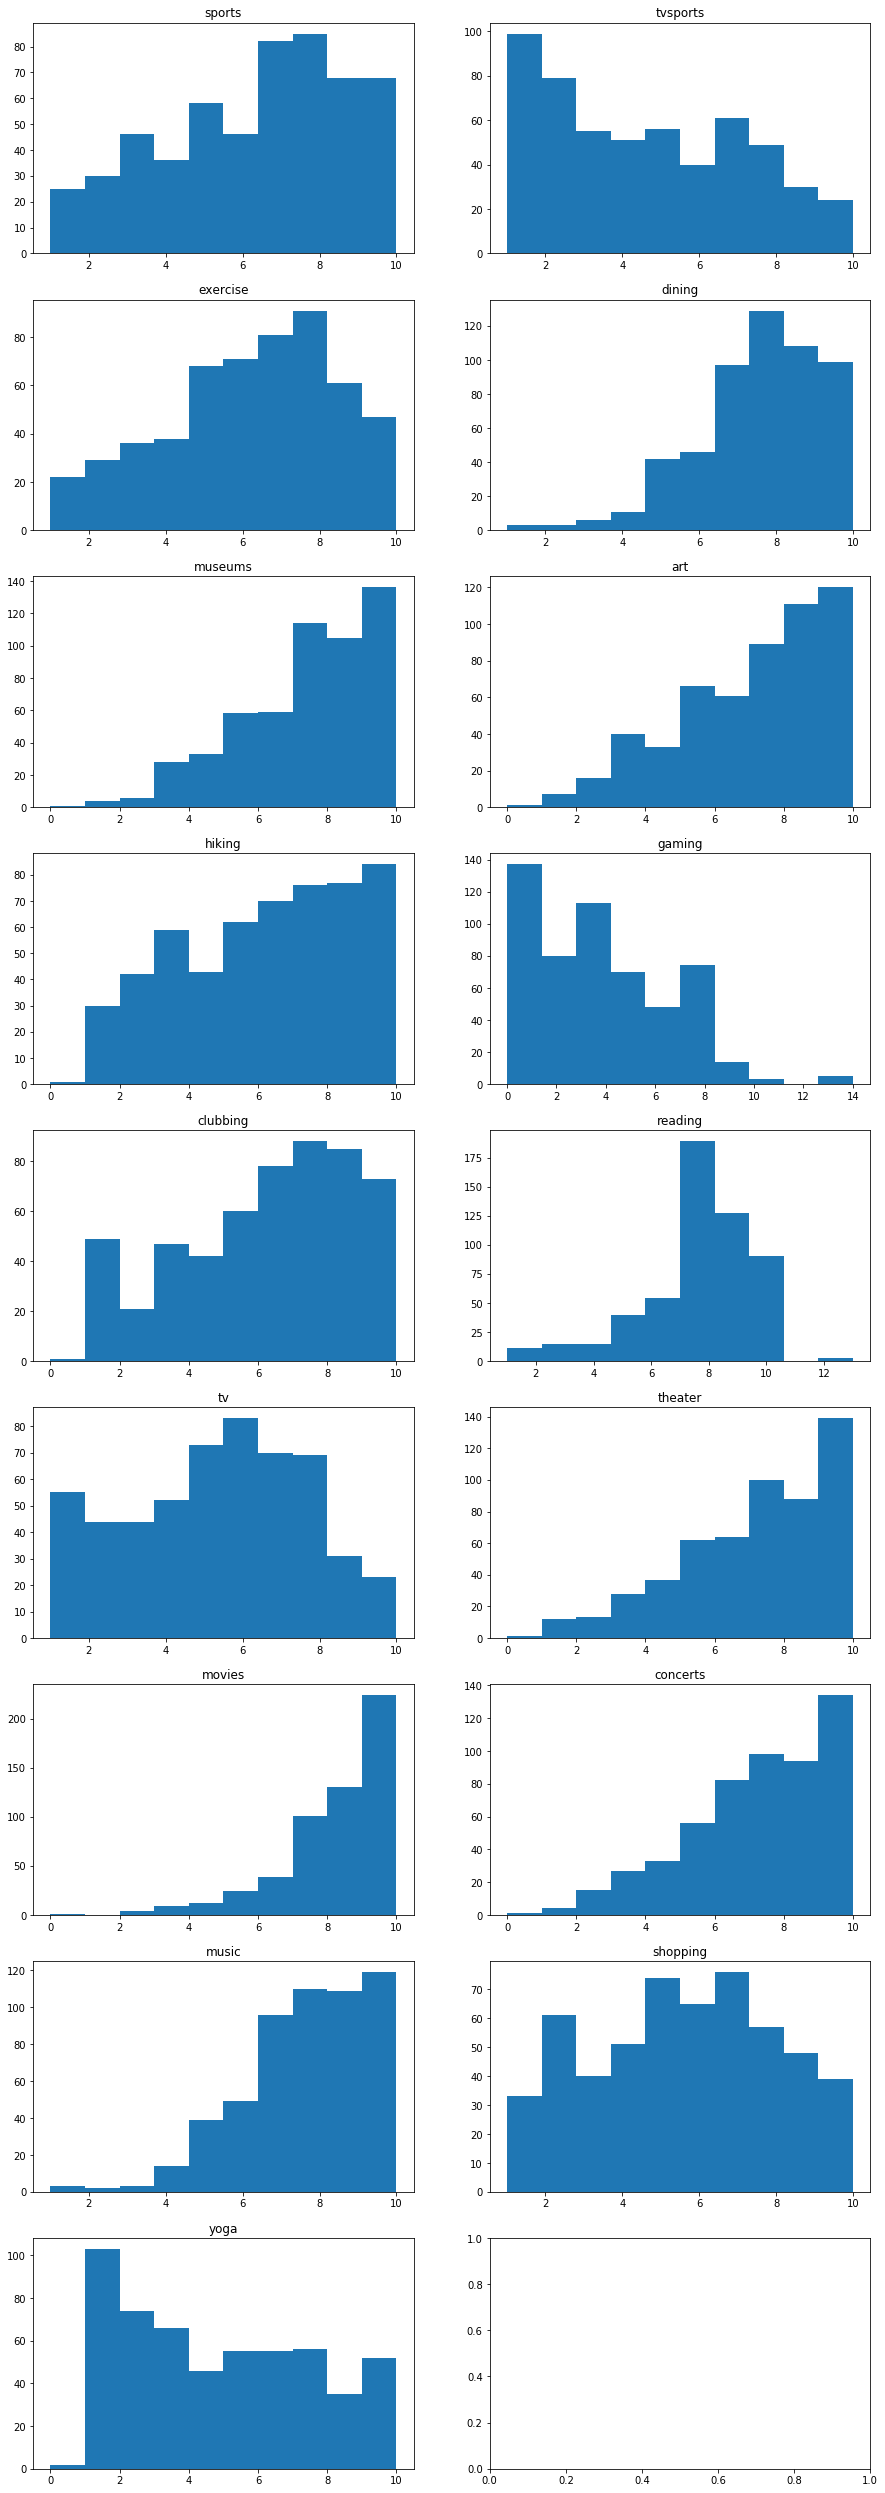

In [354]:
# Utility function to plot multiple interests
# Credit: https://www.kaggle.com/lucabasa/the-data-science-book-of-love
def many_hist(cols):
    num = len(cols)
    rows = int(num/2) + (num % 2 > 0)
    fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
    i = 0
    j = 0
    for feat in cols:
        df[feat].hist(label=feat, ax=ax[i][j])
        ax[i][j].set_title(feat, fontsize=12)
        ax[i][j].grid(False)
        j = (j+1)%2
        i = i + 1 - j
        
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']

many_hist(interests)

### Correlation between interests

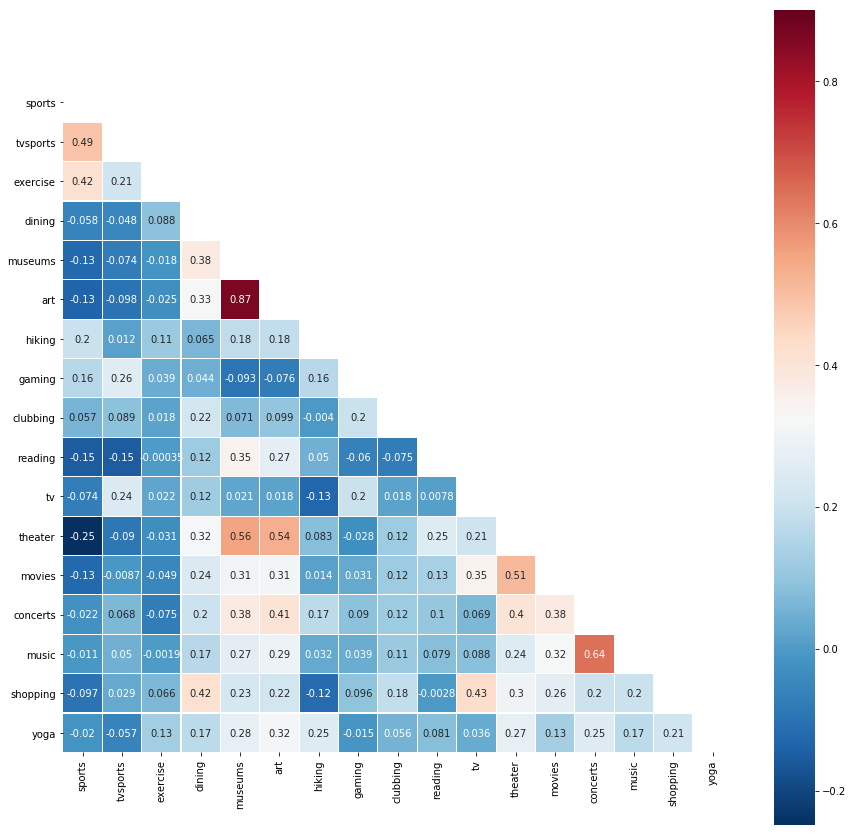

In [355]:
corr = df[interests].corr()
plt.subplots(figsize = (15,15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, annot=True,
                 mask=mask,
                 cmap = 'RdBu_r',
                 linewidths=0.1, 
                 linecolor='white',
                 vmax = .9,
                 square=True)

**There are some obvious correlations here:**

* Liking art <-> liking museums
* Liking music <-> liking concerts
* Liking sports <-> liking watching sports
* Correlation is very similar between Males and Females

**Suprises:**

* No strong relation between liking sports vs liking exercises

Do females like sports?

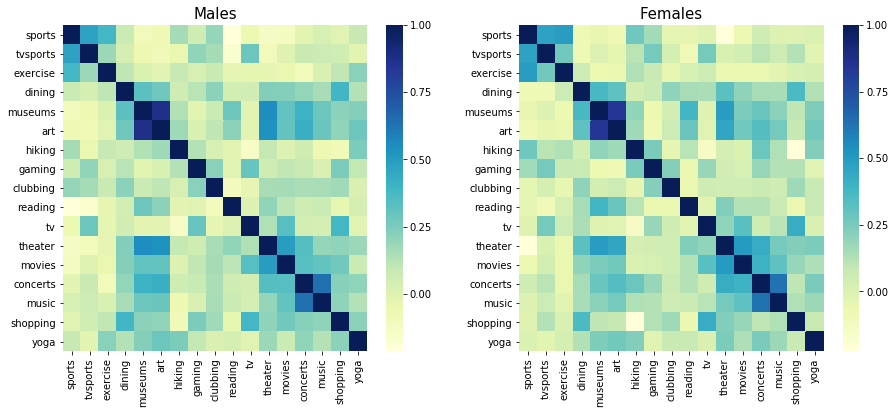

In [356]:
corr_m = df[df.gender=='Male'][interests].corr()
corr_f = df[df.gender=='Female'][interests].corr()

fig, ax= plt.subplots(1,2, figsize=(15, 6))
sns.heatmap(corr_m, cmap='YlGnBu', ax=ax[0])
sns.heatmap(corr_f, cmap='YlGnBu', ax=ax[1])

ax[0].set_title('Males', fontsize=15)
ax[1].set_title('Females', fontsize=15)
None

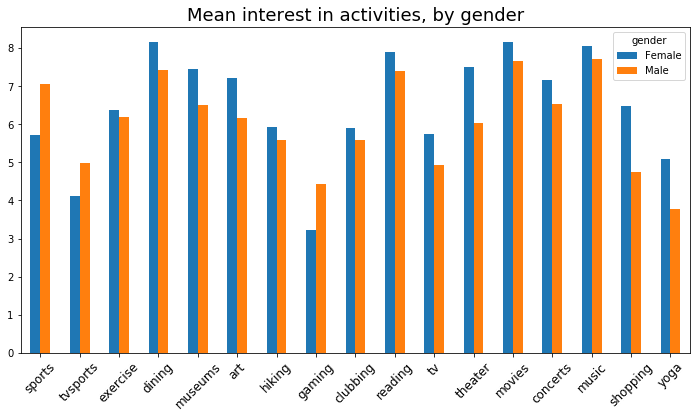

In [357]:
tmp = df[['gender']+ interests].groupby(['gender']).mean().stack().unstack(0)
ax = tmp.plot(kind='bar', figsize=(12,6))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

ax.set_title('Mean interest in activities, by gender', fontsize=18)
None

**Insights:**
    
    * Except for sports, tv sports, gaming, women have higher average interests than men in all other activities.

## Features

In [358]:
df2 = df.copy()
df2.head()

,iid,wave,gender,age,field,field_cd,undergra,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,1,1,Female,21.0,Law,1.0,NaN,Asian,2.0,4.0,Chicago,Meet new people,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0,NaN,NaN
10,2,1,Female,24.0,law,1.0,NaN,White,2.0,5.0,Alabama,Seemed like fun,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,3.0,5.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN
20,3,1,Female,25.0,Economics,2.0,NaN,White,8.0,4.0,Connecticut,Other,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,1,Female,23.0,Law,1.0,NaN,White,1.0,1.0,Texas,Seemed like fun,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,2.0,4.0,3.0,2.0,0.0,0.0,0.0,NaN,NaN
40,5,1,Female,21.0,Law,1.0,NaN,White,8.0,1.0,Bowdoin College,Meet new people,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,NaN,7.0,2.0,2.0,0.0,0.0,0.0,NaN,NaN


In [363]:
decision
df2 = data[['iid', 'wave'] + decision].drop_duplicates().copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8161 entries, 0 to 8377
Data columns (total 12 columns):
iid      8161 non-null int64
wave     8161 non-null int64
match    8161 non-null int64
dec      8161 non-null int64
attr     8041 non-null float64
sinc     7966 non-null float64
intel    7947 non-null float64
fun      7901 non-null float64
amb      7545 non-null float64
shar     7200 non-null float64
like     8004 non-null float64
prob     7941 non-null float64
dtypes: float64(8), int64(4)
memory usage: 828.9 KB


In [364]:
df3 = df2.dropna()
print('Shape after: ', df3.shape)

Shape after:  (6854, 12)


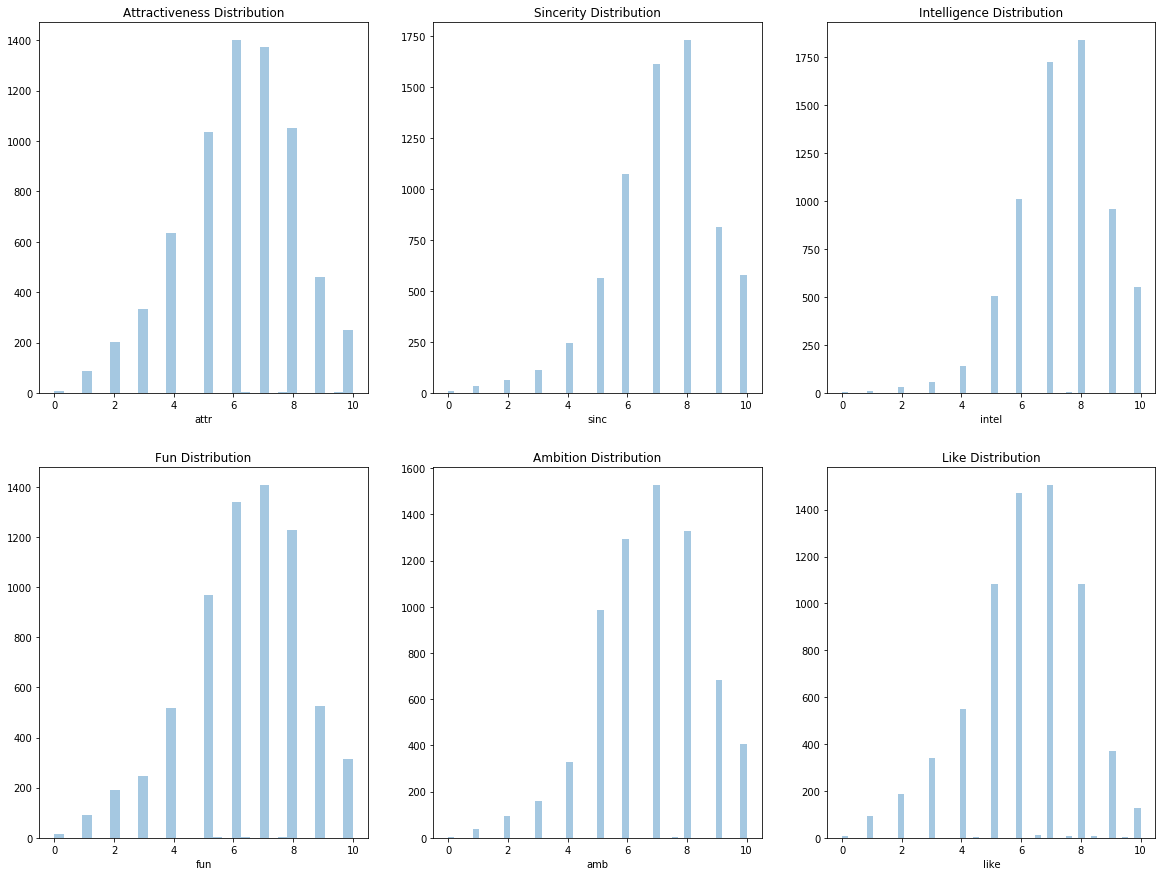

In [365]:
fig, ax = plt.subplots(figsize=(20,15), ncols=3, nrows=2)

ax[0][0].set_title("Attractiveness Distribution")
ax[0][1].set_title("Sincerity Distribution"     )
ax[0][2].set_title("Intelligence Distribution"  )
ax[1][0].set_title("Fun Distribution"           )
ax[1][1].set_title("Ambition Distribution"      )
ax[1][2].set_title("Like Distribution"          )

sns.distplot(df3.attr , kde = False, ax=ax[0][0])
sns.distplot(df3.sinc , kde = False, ax=ax[0][1])
sns.distplot(df3.intel, kde = False, ax=ax[0][2])
sns.distplot(df3.fun  , kde = False, ax=ax[1][0])
sns.distplot(df3.amb  , kde = False, ax=ax[1][1])
sns.distplot(df3.like , kde = False, ax=ax[1][2])

# 3. Data Model

![](https://pbs.twimg.com/media/CaJXHcrUAAAolhi.jpg)

**Problem Statement**: If we know a participant's decision (`dec`) and how much he or she likes the partner (`like`), can we predict what the partner's decision is? (`dec_o`)?

This is a Classification problem, and we will try both `LogisticRegression` and `Random Forest`.

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

The original data set contains non-numerical columns and null values that we have to clean up.

In [372]:
print('Original shape: ', data.shape)

Original shape:  (8378, 195)


In [373]:
numericals = ['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
       'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'dec', 'attr',
       'sinc', 'intel', 'fun', 'like', 'prob', 'met']

In [376]:
df_valid = data[numericals].dropna()
print('Cleaned data shape: ', df_valid.shape)

Cleaned data shape:  (6797, 47)


### Logistic Regression

In [370]:
X = df_valid[['like', 'dec']]
y = df_valid['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Accuracy: 0.825


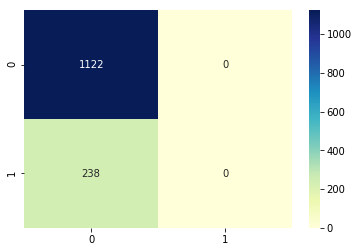

In [382]:
# Using model from sklearn library 
clf = LogisticRegression()

# Fit the model:
clf.fit(X_train, y_train) 

# Make predictions on testing set
predictions = clf.predict(X_test)
predict_proba = clf.predict_proba(X_test)

print ('Logistic Regression Accuracy:', metrics.accuracy_score(y_test, predictions))
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

In [383]:
print(metrics.classification_report(y_test, predictions))
print(predict_proba[:5])
print(predictions[:5])

             precision    recall  f1-score   support

          0       0.82      1.00      0.90      1122
          1       0.00      0.00      0.00       238

avg / total       0.68      0.82      0.75      1360

[[0.67113991 0.32886009]
 [0.99606233 0.00393767]
 [0.612932   0.387068  ]
 [0.612932   0.387068  ]
 [0.99730527 0.00269473]]
[0 0 0 0 0]


## Random Forest Model

Random Forest Accuracy: 0.8279411764705882


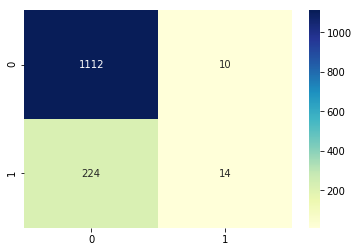

In [386]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
rfm = model.fit(X_train, y_train)
predictions = rfm.predict(X_test)
predict_proba = rfm.predict_proba(X_test)

print ('Random Forest Accuracy:', metrics.accuracy_score(y_test, predictions))
cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

# 4. Further Investigation

I did not have enough time and skills to dig deeper into the features and look into what factors play the most important role in attraction (Attractive, Interest, Ambitious, Fun, Intelligent, Sincere).

Next time!

# 5. Conclusion

Although it's doubtful how the 4-minute speed dating experiments can give us the answer to life: how to love and get loved in return? 🙏

But maybe we shouldn't forget that we should love and expect nothing in return 🤯

However, the above model suggests that how much you like someone plays an important factor to how much someone likes you back.

Other insights when we explored the data:

* Women are more difficult :)
* Research participation is Caucasians, Asians then Hispanics in decreasing order.
* Race and religion are important to women and white people :))
    * White women give more importance to Religion than others
    * Hispanic men and women are more or less the same to each other on race and religion importance.
* Except for sports, tv sports, gaming, women have higher average interests than men in all other activities.

## Credits

* Kaggle:
    * https://www.kaggle.com/annavictoria/speed-dating-experiment
    * https://www.kaggle.com/lucabasa/the-data-science-book-of-love/
    * https://www.kaggle.com/aeshen/the-secret-to-getting-the-second-date
    * https://www.kaggle.com/grayengineering425/statistical-analysis-of-speed-dating